In [53]:
# load packages
import mlflow
import yaml
import numpy as np
import shap
import pandas as pd
import pickle
import matplotlib.pyplot as plt
# import pickle 5 as pickle in case model cannot be loaded (was exported under Python 3.8)
#import pickle5 as pickle
import os
import seaborn as sns
#path = os.getcwd()
#print(path)

In [18]:
# read in (yaml) configs
with open('../conf/predict_config.yaml', 'r') as conf:
    model_config = yaml.safe_load(conf)

# import data
dataset = model_config['model']['loc'] + model_config['model']['file']
dataset = pd.read_csv(dataset)

# define predictors and target
predictor   =  model_config['features']['predictors']
target = model_config['features']['target']

In [19]:
# prepare data
X = dataset[predictor]
y = dataset[target]
print('X Shape:', X.shape)
print('y Shape:', y.shape)


X Shape: (11732, 12)
y Shape: (11732, 1)


In [20]:
# load the model from model folder 
filename = model_config['model']['model_loc'] + model_config['model']['champion'] 

# apply model on dataset
# import pickle 5 as pickle in case model cannot be loaded 
# (was exported under Python 3.8) - see first cell
model = pickle.load(open(filename, 'rb'))
y_pred = model.predict(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


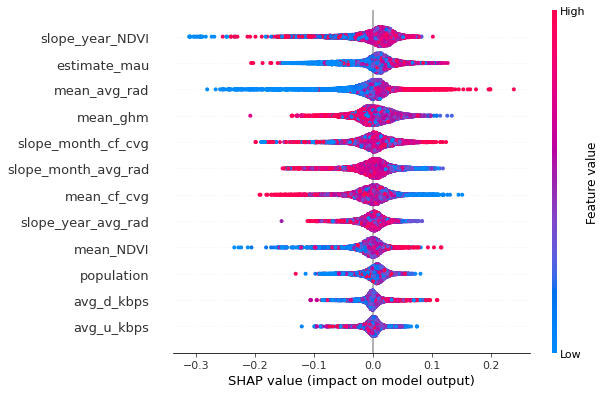

In [21]:
#generate and plot Shapley values 
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

In [22]:
#calculate the absolute error
errors = abs(y_pred - y.iloc[:,0].to_numpy())

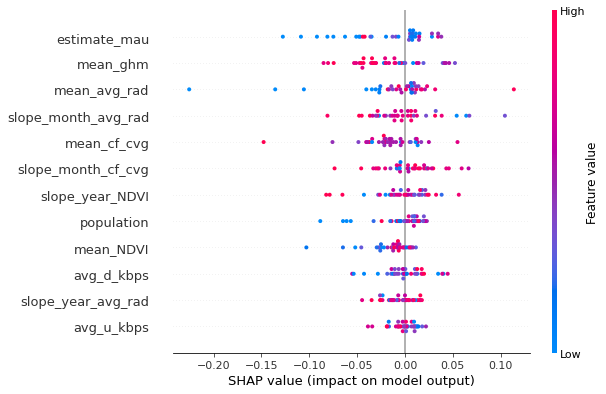

In [24]:
#subset to high error predictions and plot respective Shapley values 
X_high= X.iloc[errors > 0.4]
shap_values_error = explainer.shap_values(X_high)
shap.summary_plot(shap_values_error, X_high)

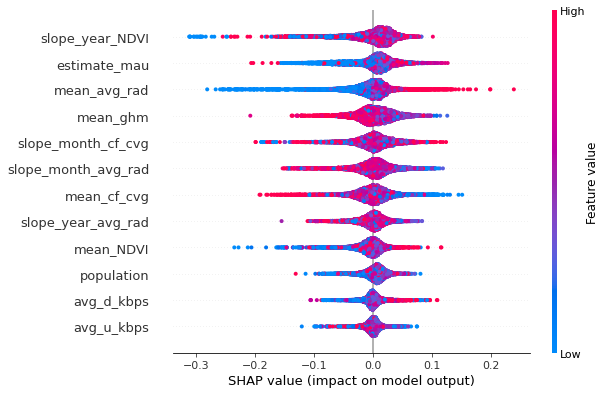

In [25]:
#subset to low error predictions and plot respective Shapely values
X_low = X.iloc[np.where( (errors < 0.05))]
shap_values_error = explainer.shap_values(X_low)
shap.summary_plot(shap_values_error, X_low)

In [87]:
#define function that plots individual local Shapely values (feature importances) for high error
shap.initjs()
def shap_plot_in(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(X_high)
    #fig, ax = p.subplots(1,figsize=(30,3))
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], 
                        X_high.iloc[[j]],matplotlib=True, show=True, figsize=(30,4))
    
    return(p)

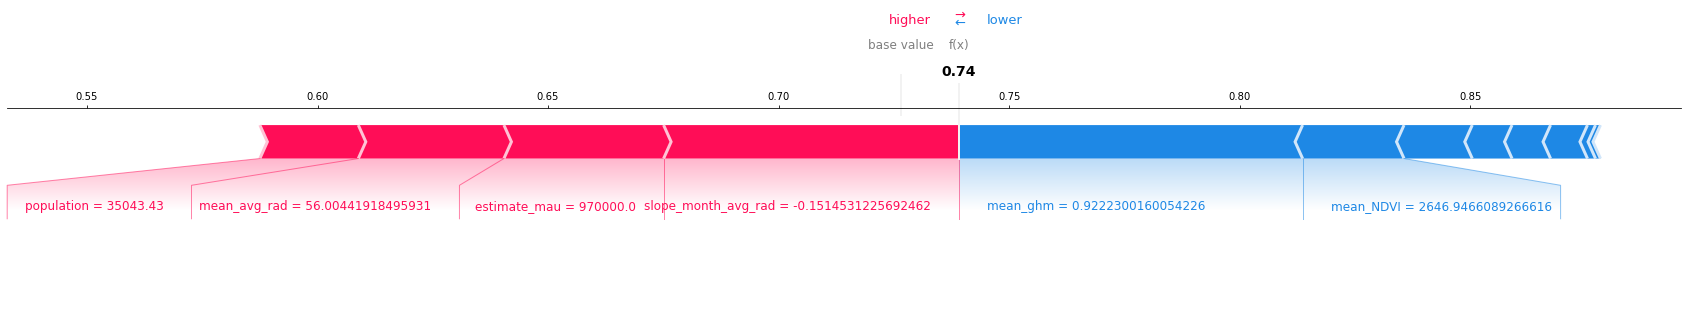

In [88]:
#plot individual Shapely values. Changing the integer in brackets interates through all observations in that subset
shap_plot_in(10)

In [90]:
#define function that plots individual local Shapely values (feature importances) for low error
shap.initjs()
def shap_plot_acc(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(X_low)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j],
                        X_low.iloc[[j]],matplotlib=True, show=True, figsize=(30,4))
    return(p)

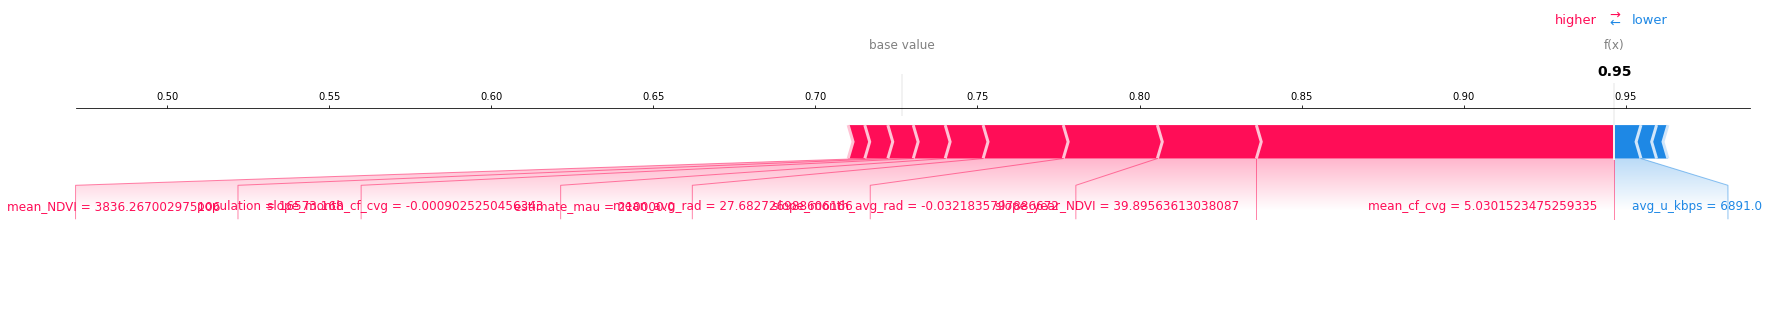

In [91]:
#plot individual Shapely values. Changing the integer in brackets interates through all observations in that subset
shap_plot_acc(24)